<a href="https://colab.research.google.com/github/MaxVieiraSantiago/Machine-Learning-Algorithms/blob/master/Random%20Forest/RandomForest_Classifier_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
url = 'https://raw.githubusercontent.com/MaxVieiraSantiago/Machine-Learning-Algorithms/master/Dataset/heart.csv'

dados = pd.read_csv( url )

In [21]:
dados.shape

(1025, 14)

In [17]:
dados.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [19]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [24]:
dados.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
dados.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
dados['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

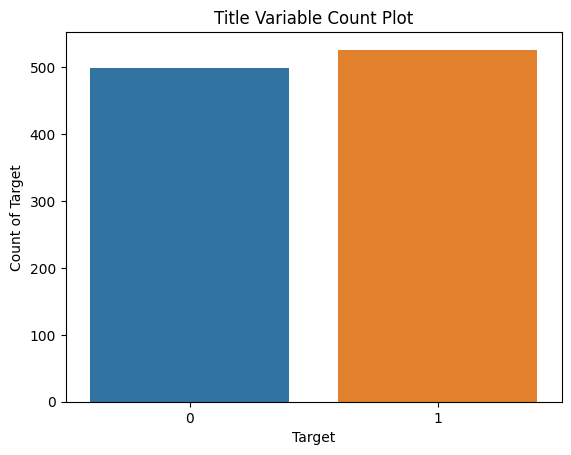

In [25]:
sns.countplot( data = dados, x = dados['target'] )
plt.xlabel( 'Target' )
plt.ylabel( 'Count of Target' )
plt.title( 'Title Variable Count Plot' )
plt.show()

In [26]:
X = dados.drop( 'target', axis=1 )
y = dados['target']

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [28]:
X_train, X_teste, y_train, y_teste = train_test_split( X, y, random_state = 1 )

In [29]:
clf = RandomForestClassifier( criterion='gini', max_depth=8, min_samples_split=10, random_state= 1 )

In [31]:
clf.fit( X_train, y_train );

In [32]:
clf.feature_importances_

array([0.07231761, 0.03224998, 0.15617741, 0.06189   , 0.059972  ,
       0.00531237, 0.01781195, 0.1048188 , 0.06814868, 0.11220587,
       0.05778696, 0.10447955, 0.14682882])

In [34]:
dados.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [35]:
for feature, importancia in zip ( dados.columns, clf.feature_importances_):
  print(f'{feature} : {importancia * 100:,.2f}%' )

age : 7.23%
sex : 3.22%
cp : 15.62%
trestbps : 6.19%
chol : 6.00%
fbs : 0.53%
restecg : 1.78%
thalach : 10.48%
exang : 6.81%
oldpeak : 11.22%
slope : 5.78%
ca : 10.45%
thal : 14.68%


In [38]:
y_pred = clf.predict( X_teste )
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1])

In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix( y_teste, y_pred )

array([[128,   2],
       [  1, 126]])

In [42]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score( y_teste, y_pred ) * 100

print(f'Accuracy Score : {accuracy:,.2f}%')

Accuracy Score : 98.83%


In [44]:
from sklearn.model_selection import cross_val_score

cross_val_score( clf, X_train, y_train, cv=10 )

array([0.97402597, 0.97402597, 0.92207792, 0.93506494, 0.93506494,
       0.98701299, 0.97402597, 0.94805195, 0.97368421, 0.94736842])

In [51]:
from sklearn.metrics import classification_report
print( classification_report( y_teste, y_pred ) )

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       130
           1       0.98      0.99      0.99       127

    accuracy                           0.99       257
   macro avg       0.99      0.99      0.99       257
weighted avg       0.99      0.99      0.99       257



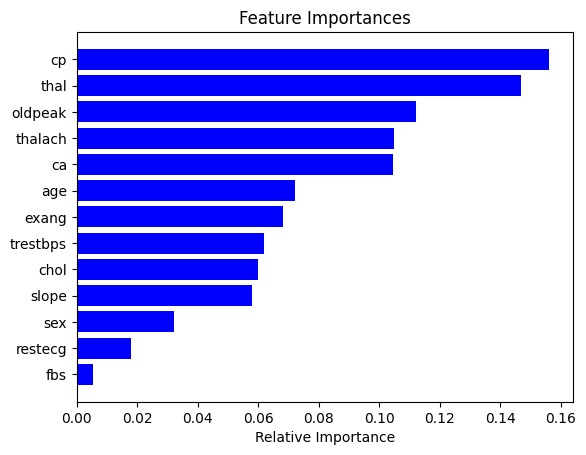

In [53]:
features = dados.columns
importances = clf.feature_importances_
indices = np.argsort( importances )
plt.title( 'Feature Importances' )
plt.barh( range(len( indices ) ), importances[ indices ], color='b', align='center' )
plt.yticks( range(len(indices)), [ features[i] for i in indices ])
plt.xlabel( 'Relative Importance' )
plt.show()